## Intoduction

The aim of this project is detiecting fraudulent or non-fraudulent transactions while dealing with imbalanced data. To achieve this, various supervised learning algorithms will be used and the reults will be compared.

Imbalanced data refers to calssification problems based on the binary class inquality. There are several methods for dealing with this problem like Re-Sampling, Generate Synthetic Samples, Anomaly Detection Methods or performance metrics insted of accuracy results.

In this project, the undersampling method will be implemented to the majority class and performance metrucs such as Precision, Recall, F1 Score and AUC and some anomaly detection methods like one-class SVM and Neural Network will be used to find the best algorithm which highly predicted fraudulent or non-fraudulent transactions.

The project has 4 main topics:

    1. Data Exploration
    2. Hyperparameter Optimisation
    3. Model Building
    4. comparing Perforamance Metrics

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('C:/Users/vivek/Documents/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Data Exploratory
In this par; the structure of the data, missing values, features distribution and the relationship betweent them and target value characteristics will be examined in detail.

First data structure will be checked.

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

As mention on the data information section, except Time, Amount and Class features others can not interpret alone. And they don't information about context. But we all know that features which are from V1 to V28 have been dimensionally reduction by PCA and no need to be standardized again. But the other features which we have meaning in that data, it can be expanded on.

Text(0, 0.5, 'Fraudulent Transaction Non-Fraudulent Transaction')

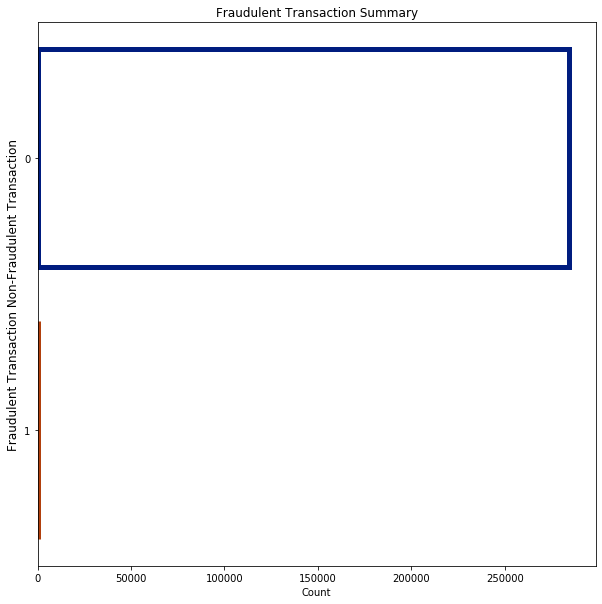

In [5]:
# Next, class feature will be examined.
plt.figure(figsize=(10,10))
sns.countplot(
    y="Class",
    data=data,
    facecolor=(0, 0, 0, 0),
    linewidth=5,
    edgecolor=sns.color_palette("dark", 2))

plt.title('Fraudulent Transaction Summary')
plt.xlabel('Count')
plt.ylabel('Fraudulent Transaction Non-Fraudulent Transaction', fontsize=12)

In [6]:
data_value= data["Class"].value_counts()

In [7]:
print(data_value)
print(data_value/284807)

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


The graph and tables show that there is a huge difference between nonfraudulent and fraudulent data. This situation can interpretable as imbalanced data. Imbalanced data can cause classification problems like incorrect high accuracy. There are some apporoaches to avoid imbalanced data like oversampling, undersampling or Synthetic Data Generation. But in this projects, I will use the undersampling method and values of the majority class will be reduced. Then I will compare models by perfomance metrics.

Another part is, Class structure will be converted to category and distrbution of Time and Amount features will be examined.

In [8]:
data['Class'] = data['Class'].astype('category')

C:\Users\vivek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


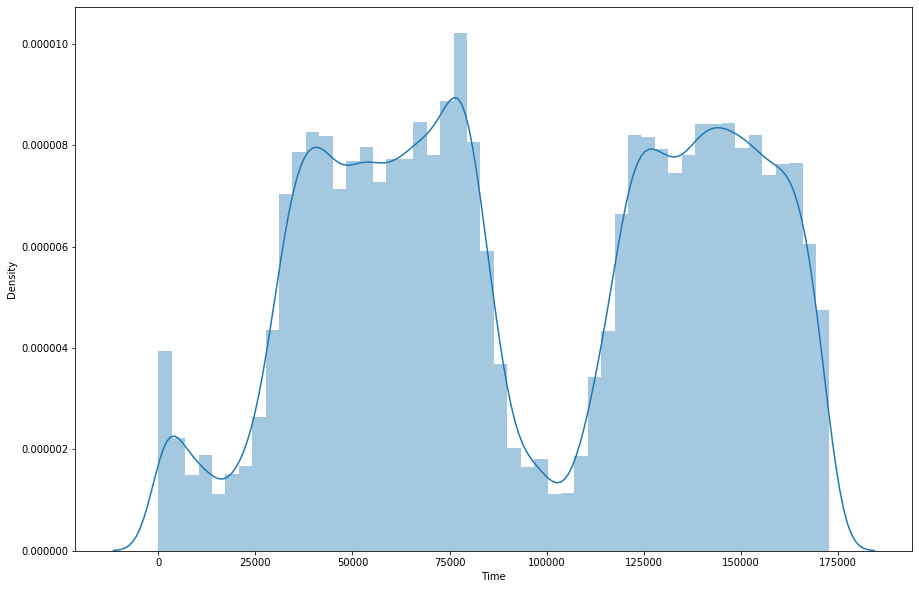

In [9]:
#Distribution of Time
plt.figure(figsize=(15,10))
sns.distplot(data['Time'])

C:\Users\vivek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


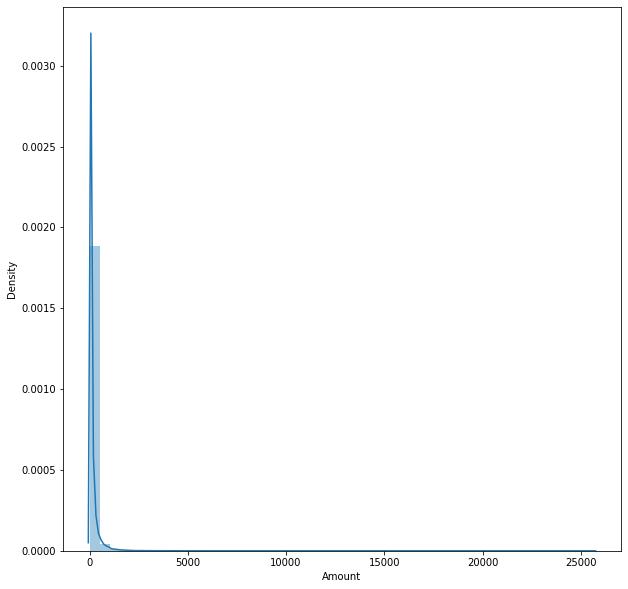

In [10]:
#Distribution of Amount
plt.figure(figsize=(10,10))
sns.distplot(data['Amount'])

Above graphs show that Time ans Amount features needed to standardize. Standardization will be used to Time and Amount features for 0 mean and 1 std. This method preserves the shape of data and help to build features that have similar ranges to each other.

In [11]:
data['Hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24 )

In [12]:
#class vs Amount vs Hour
pd.pivot_table(
    columns= "Class",
    index="Hour",
    values="Amount",
    aggfunc="count",
    data=data)

Class,0,1
Hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


Text(0.5, 1.0, 'Fraudulent Transaction')

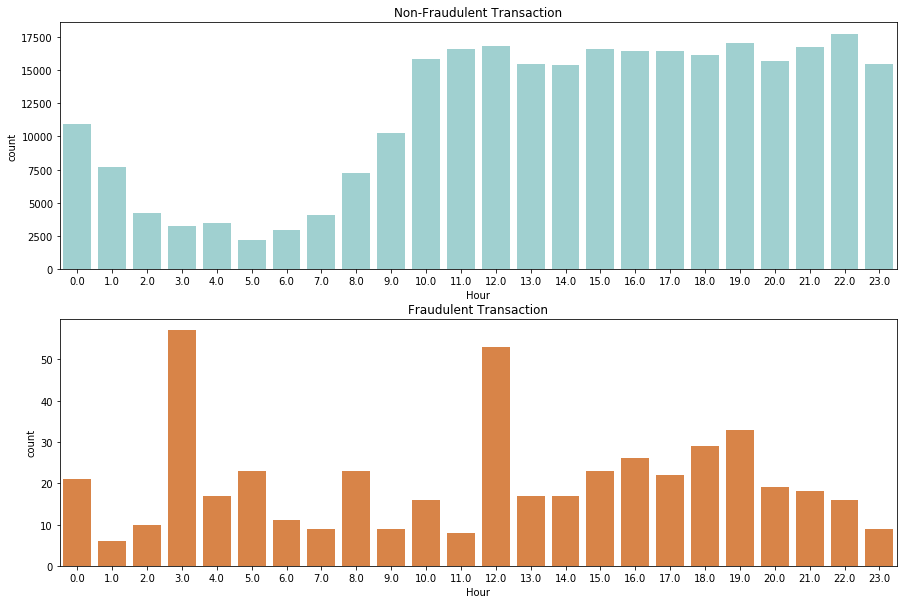

In [13]:
#Hour vs Class
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="Hour",
    data=data[data['Class']==0],
    color="#98D8D8",
ax=axes[0])
axes[0].set_title("Non-Fraudulent Transaction")

sns.countplot(
x="Hour",
data=data[data['Class']==1],
color="#F08030",
ax=axes[1])
axes[1].set_title("Fraudulent Transaction")

Above graphs show that non-fraudulent and fraudulent transactions have been made in every hour. For the fraudulent transaction in third and twelfth hours have the highest record. On the other hand, after the eighth hour, non-fraudulent transaction counts are nearly close to each other.

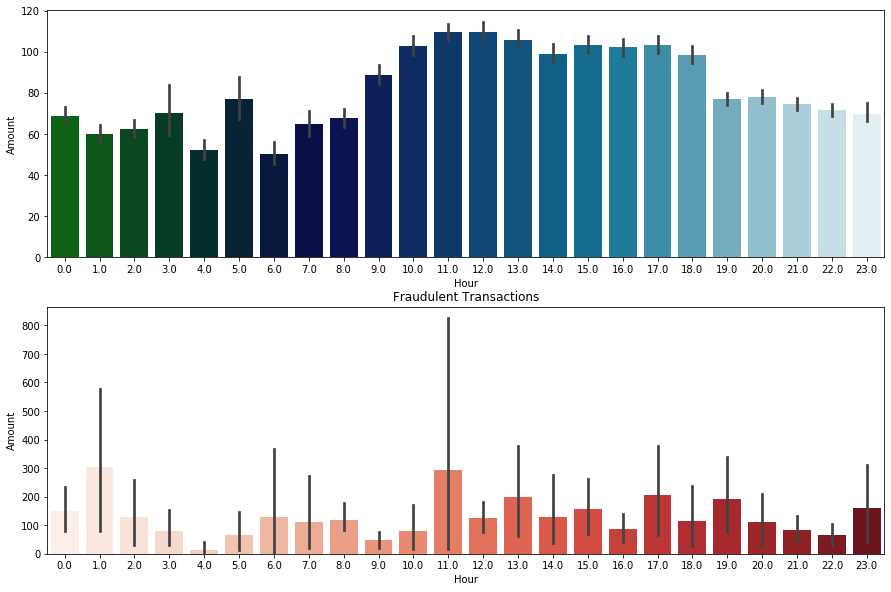

In [14]:

#Amount vs Hour vs Class
fig, axees = plt.subplots(2, 1, figsize=(15, 10))

plt.title("Non-Fraudulent Transactions")
sns.barplot(
    x='Hour',
    y='Amount', 
    data=data[data['Class'] == 0], 
    palette="ocean", 
    ax=axees[0])

plt.title("Fraudulent Transactions")
sns.barplot(
    x='Hour', 
    y='Amount', 
    data=data[data['Class'] == 1], 
    palette="Reds", 
    ax=axees[1])


Above graphs show fraudulent and non-fraudulent transactions' amounts at 1 hour granularity. Based on the error bar, the amount of variation of the non-fraudulent transaction in each hour is not widely. However, in the fraudulent transaction, some data points especially first, sixth, and eleventh hours, the range of amounts is visible large. This means that there is a high difference in the amount varies between upper and lower limits.

In [15]:
#Drop hour feature before continues next analysis.
data=data.drop(['Hour'], axis=1)

Data exploration results and graphs show that feature size is big and class sizes imbalanced, so, dimensionality reduction helps to an interpretation of results easier. To achieve this, t-distributed stochastic neighbor embedding(t-SNE) method will be used. This method is one of the dimensionality reduction technique to make visualization in a low-dimensional space. Thus we can look details more smooth. This technique works well on high dimensional data and converts it to two- or three- dimensional spot.

In [16]:
data_nonfraud = data[data['Class'] == 0].sample(2000)
data_fraud  = data[data['Class'] == 1]

data_new = data_nonfraud.append(data_fraud).sample(frac=1)
X = data_new.drop(['Class'], axis = 1).values
y = data_new['Class'].values

In [17]:
tsne = TSNE(n_components=2, random_state=42)
X_transformation = tsne.fit_transform(X)

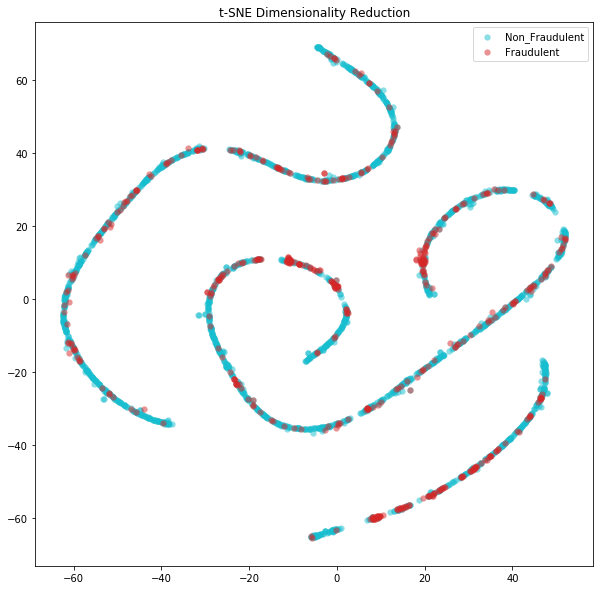

In [18]:
plt.figure(figsize=(10,10))
plt.title("t-SNE Dimensionality Reduction")

def plot_data(X, y):
    plt.scatter(X[y == 0,0], X[y == 0, 1], label="Non_Fraudulent", alpha=0.5, linewidth=0.15, c='#17becf')
    plt.scatter(X[y == 1,0], X[y == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='#d62728')
    plt.legend()
    return plt.show()

plot_data(X_transformation, y)


Above graph shows that fraudulent and non-fraudulent transactions aren't well spearated int two different clusters in the two-dimensional space. This led to two types of transactions are very similar. Also, this grap demonstrates that accuracy results won't be enough for choosing the best algorithm.

## Standardization
Standardization of Time and Amount features will be made.

In [19]:
data[['Time','Amount']] = StandardScaler().fit_transform(data[['Time','Amount']])

## Pearson Correlation Matrix
The final part is computing a correlation matrix by the Pearson method and analyze relationships between features.

In [20]:
corr=data.corr(method='pearson')

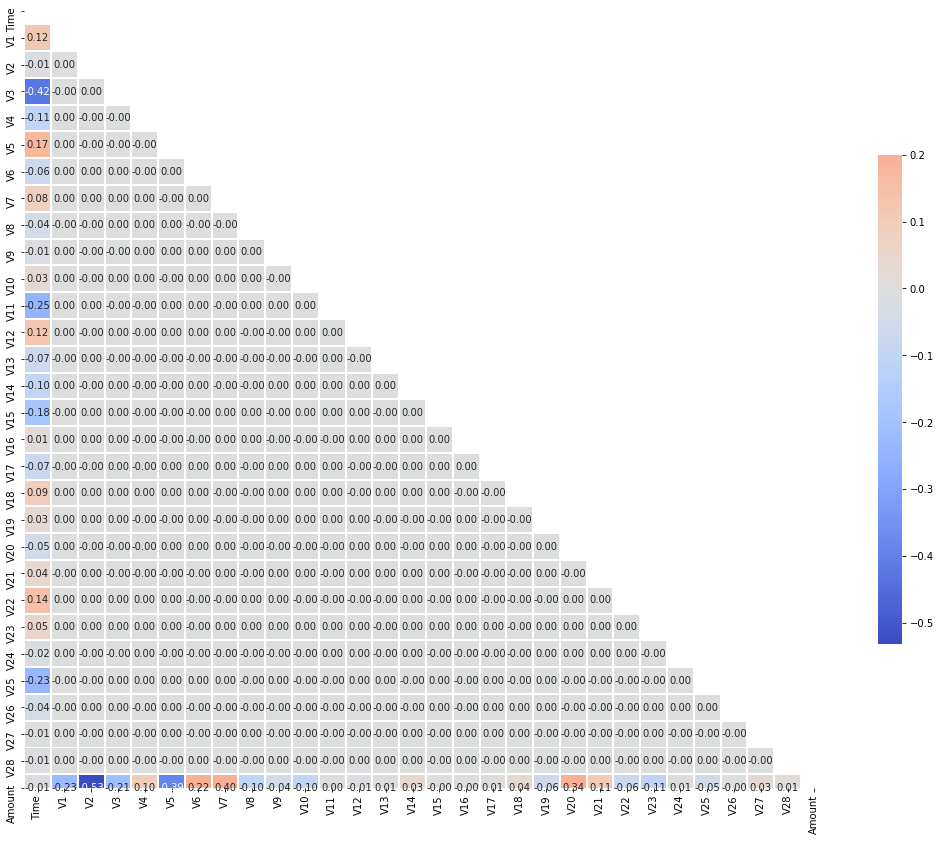

In [23]:
plt.figure(figsize=(18, 18))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns, 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f",
    mask=mask, 
    vmax=.2, 
    center=0,
    square=True, 
    linewidths=1, 
    cbar_kws={"shrink": .5})

The Correlation matrix shows that almost all parameters have no strong relationship with each other. The highest correlation is negative and 53%. These results shows that there is no need to take out any feature from model building on the ground of high correlation.

## 2. Hyperparameter Optimization
This method helps to find the most optimal parameters for machine learning algorithms. It has curcial importance before proceeding to model training. The Grid Search Algorithms will be used for the tuning hyperparametes. Then, XGBoost model will be built to achieve the fature importance graph. This graph helps to choose parametes which will be used on the training model.

In [24]:
# First train and label data created.
train_data, label_data = data.iloc[:,:-1],data.iloc[:,-1]

#Convert to matrix
data_dmatrix = xgb.DMatrix(data=train_data, label= label_data)



In [25]:
#Split data randomly to train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.3,random_state=42)

In [26]:
## Defining parameters

#grid_param = {'n_estimators': [50, 100, 500],'max_depth': [4, 8], 
            #'max_features': ['auto', 'log2'], 
            #'criterion': ['gini', 'entropy'],
            #'bootstrap': [True, False]}

## Building Grid Search algorithm with cross-validation and F1 score.

#grid_search = GridSearchCV(estimator=xg_class,  
                     #param_grid=grid_param,
                     #scoring='f1',
                     #cv=5,
                     #n_jobs=-1)

## Lastly, finding the best parameters.

#grid_search.fit(X_train, y_train)
#best_parameters = grid_search.best_params_  
#print(best_parameters)


Based on the reulst of GridSearch parameters, parametes will be defined and XGBoost algorithm can build.

[10:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "criterion", "max_features", "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




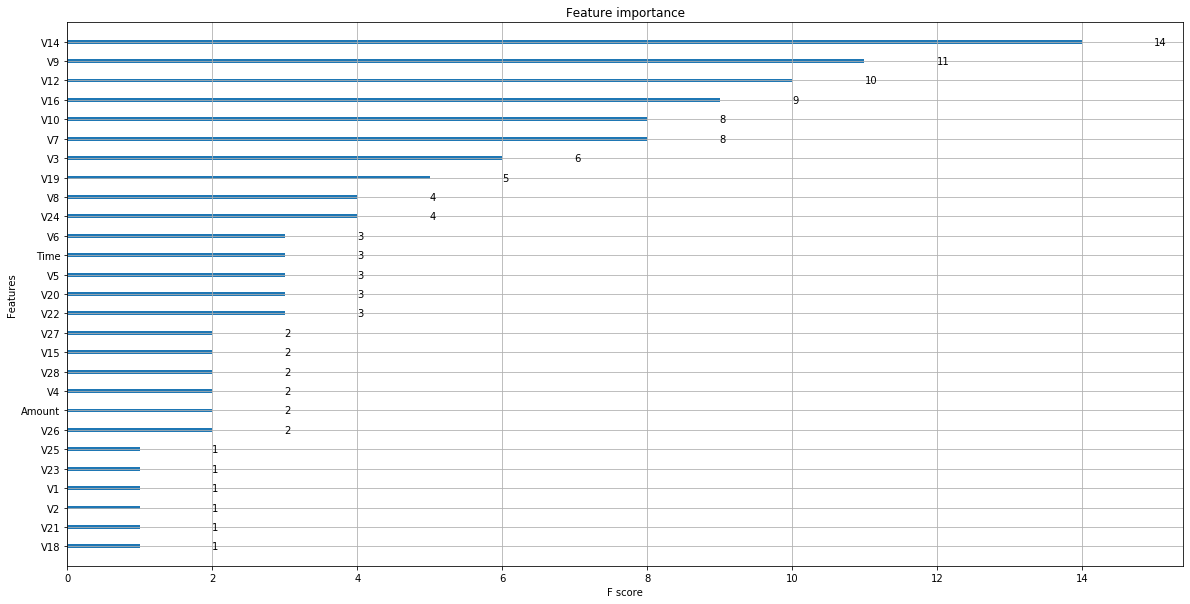

In [27]:
params = {
    'objective':'reg:logistic',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'bootstrap': True, 
    'criterion': 'gini', 
    'max_depth': 4, 
    'max_features': 'auto', 
    'n_estimators': 50
}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

#Feature importance graph
plt.rcParams['figure.figsize'] = [20, 10]
xgb.plot_importance(xg_reg)

Above graph shows that the highest important feature is V16 and this feature has a great difference with the second important one based on F score. Lowest importance parameters are V13,V25,Time,V20,V22,V8,V15,V19, and V2. These variables will be eliminated from data before model building.

In [29]:
data_model = data.drop(['V13', 'V25', 'Time', 'V20', 'V22', 'V8', 'V15', 'V19', 'V2'], axis=1)

## 3. Model Building
In this part, Random Forest, Support Vector Machine, Logistic Regression, and Multilayer Perceptron - Neural Network algorithms will be built.

Binary Support Vector Machine and Neural Network algorithms are one of the Anomaly Detection methods, therefore, they are chosen.
Since imbalance data have a predisposition to overfitting, Random Forest is one of the methods for preventing overfitting. For this reason, this method has been chosen.
Logistic Regression is one of the important models when the target variable is binary.
In this part, the important parameter is "class_weight" with balanced mode. It helps to adjust the model and this mode uses the values of y to automatically adjust weights. This adjustment method will help to get the best recall-precision trade-off.

Before the model building, the undersampling method will be applied. The output of this process will fed into model building phase.

## 3.1 Undersampling Method**
One of the most common ways of dealing with imbalanced data is undersampling method. This method helps to decrease the number of majority class. In this project, %5 out of non-fraudulent data have been chosen.


In [30]:
data_under_nonfraud = data_model[data_model['Class'] == 0].sample(15000)
data_under_fraud  = data_model[data_model['Class'] == 1]

data_undersampling = data_under_nonfraud.append(data_under_fraud, 
                                                ignore_index=True, sort=False)

Text(0, 0.5, 'Fraudulent Transaction,        Non-Fraudulent Transaction')

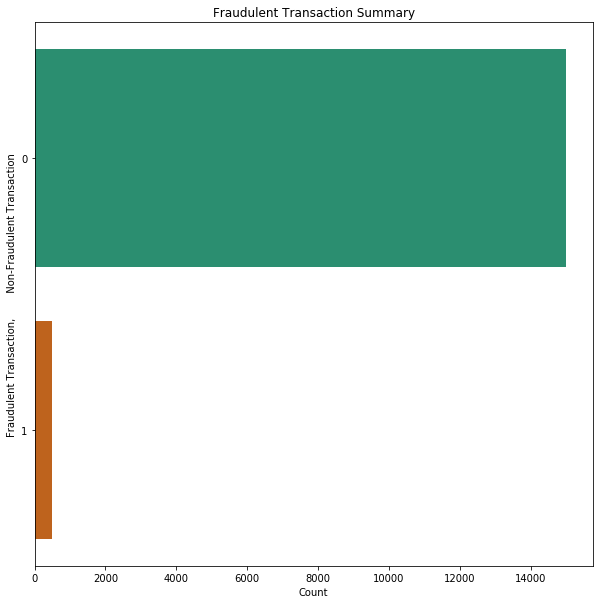

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(y="Class", data=data_undersampling,palette='Dark2')
plt.title('Fraudulent Transaction Summary')
plt.xlabel('Count')
plt.ylabel('Fraudulent Transaction,        Non-Fraudulent Transaction')

## 3.2 Data Splitting

In [32]:
# New data will be split randomly to train and test subsets. Train data proportion is 70% and the test data proportion is 30%.

model_train, model_label = data_undersampling.iloc[:,:-1],data_undersampling.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
                                        model_train, model_label, test_size=0.3, random_state=42)

## 3.3 K-fold Cross Validation Method

In [33]:
#5-fold Cross Validation method will be used.

kfold_cv=KFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## 3.4 Random Forest

In [34]:
# Define the model as the Random Forest
modelRF = RandomForestClassifier(
    n_estimators=500, 
    criterion = 'gini', 
    max_depth = 4, 
    class_weight='balanced', 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_RF = modelRF.predict(X_test)

## 3.5 Support Vector Machine

In [35]:
# Define the model as the Support Vector Machine
modelSVM = svm.SVC(
    kernel='rbf', 
    class_weight='balanced', 
    gamma='scale', 
    probability=True, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_SVM = modelSVM.predict(X_test)

## 3.6 Logistic Regression

In [36]:
# Define the model as the Logistic Regression
modelLR = LogisticRegression(
    solver='lbfgs', 
    multi_class='multinomial',
    class_weight='balanced', 
    max_iter=500, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_LR = modelLR.predict(X_test)

## 3.7 Neural Network - Multilayer Perceptron

In [38]:
# Define the model as the Multilayer Perceptron
modelMLP = MLPClassifier(
    solver='lbfgs', 
    activation='logistic', 
    hidden_layer_sizes=(100,),
    learning_rate='constant', 
    max_iter=1500, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_MLP = modelMLP.predict(X_test)

## 4. Comparing Performance Metrics
In this part, instead of accuracy results, other performance metrics will be compared. Because, the highest accuracy results in imbalanced data may be achieved from non-fraudulent transaction predictions, thus, the results can be misleading for predictive modeling.

The following metrics are in interest;

Confusion Matrix Fraud predictive part,
Precision,
Recall,
F1 Score and
AUC values
Before starting to compare, I would like to explain some performance metrics:

<b>Precision</b>: It explains, when the predicted value is 1, how often is it correct.</br>
<b>Recall</b>: It explains, when the actual value is 1, how often does it predict 1.</br>
<b>F1 Score</b>: It explains, the weighted average of the recall and precision.</br>
<b>AUC</b>: It explains, which model predicts the best classification. .</br>
Lastly, we can say that precision and recall are good metrics when the positive class is smaller. These metrics are good to detect positive samples accuratley.

In [39]:
RF_matrix = confusion_matrix(y_test, predict_RF)
SVM_matrix = confusion_matrix(y_test, predict_SVM)
LR_matrix = confusion_matrix(y_test, predict_LR)
MLP_matrix = confusion_matrix(y_test, predict_MLP)

[Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')]

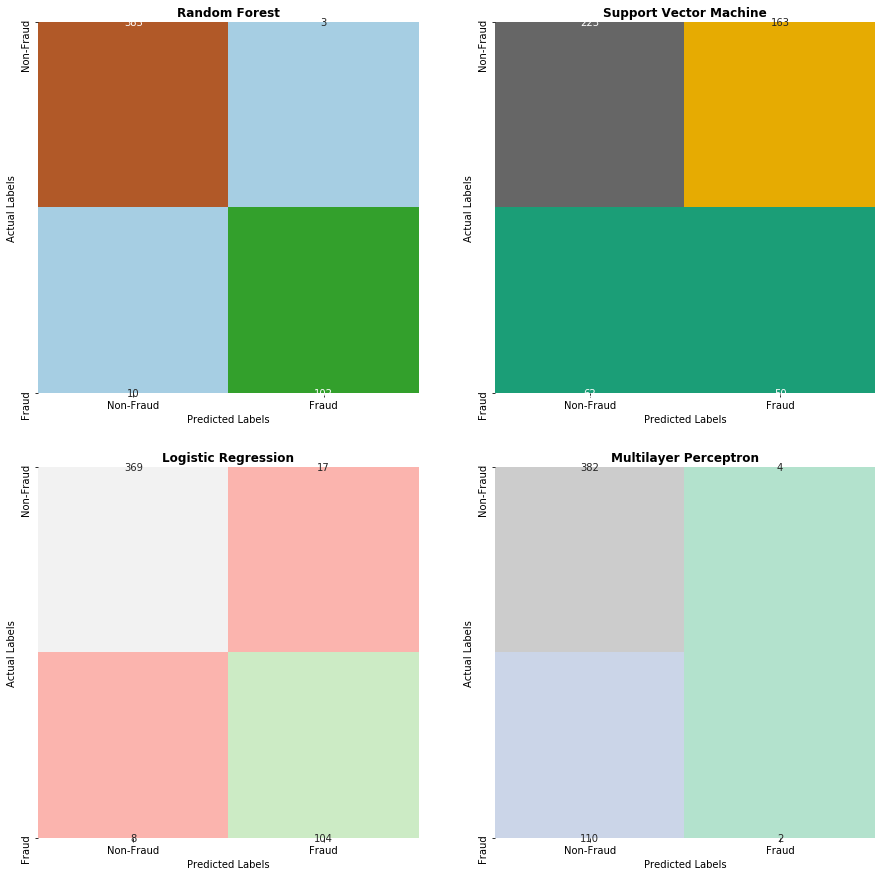

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.heatmap(RF_matrix, annot=True, fmt="d",cbar=False, cmap="Paired", ax = ax[0,0])
ax[0,0].set_title("Random Forest", weight='bold')
ax[0,0].set_xlabel('Predicted Labels')
ax[0,0].set_ylabel('Actual Labels')
ax[0,0].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[0,0].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

sns.heatmap(SVM_matrix, annot=True, fmt="d",cbar=False, cmap="Dark2", ax = ax[0,1])
ax[0,1].set_title("Support Vector Machine", weight='bold')
ax[0,1].set_xlabel('Predicted Labels')
ax[0,1].set_ylabel('Actual Labels')
ax[0,1].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[0,1].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

sns.heatmap(LR_matrix, annot=True, fmt="d",cbar=False, cmap="Pastel1", ax = ax[1,0])
ax[1,0].set_title("Logistic Regression", weight='bold')
ax[1,0].set_xlabel('Predicted Labels')
ax[1,0].set_ylabel('Actual Labels')
ax[1,0].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[1,0].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

sns.heatmap(MLP_matrix, annot=True, fmt="d",cbar=False, cmap="Pastel2", ax = ax[1,1])
ax[1,1].set_title("Multilayer Perceptron", weight='bold')
ax[1,1].set_xlabel('Predicted Labels')
ax[1,1].set_ylabel('Actual Labels')
ax[1,1].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[1,1].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

Below graphs show that the confusion matrix result of each ML algorithm. For imbalanced data, confusion matrix results can be incorrect. However, it is useful to say how many fraudulent transactions predicted correctly. Based on the graphs, Multilayer Perceptron, Random Forest and Logistic Regression models predict much the same Fraudulent transaction.

In [41]:
print("Classification_RF:")
print(classification_report(y_test, predict_RF))
print("Classification_SVM:")
print(classification_report(y_test, predict_SVM))
print("Classification_LR:")
print(classification_report(y_test, predict_LR))
print("Classification_MLP:")
print(classification_report(y_test, predict_MLP))

Classification_RF:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       386
           1       0.97      0.91      0.94       112

    accuracy                           0.97       498
   macro avg       0.97      0.95      0.96       498
weighted avg       0.97      0.97      0.97       498

Classification_SVM:
              precision    recall  f1-score   support

           0       0.78      0.58      0.66       386
           1       0.23      0.45      0.31       112

    accuracy                           0.55       498
   macro avg       0.51      0.51      0.49       498
weighted avg       0.66      0.55      0.58       498

Classification_LR:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       386
           1       0.86      0.93      0.89       112

    accuracy                           0.95       498
   macro avg       0.92      0.94      0.93       498
weighted avg    


Above table shows, precision, recall, and F1-score results.

1. Logistic Regression model has the highest recall. This means that the Logistic Regression model has a better prediction of an actual fraudulent transaction as a fraudulent transaction.
2. However, when we look at the precision result, Logistic Regression is one of the lowest results. The highest one achieved with Random Forest. High precision relates to the low false positive rate, so we can say that Random Forest model predict the least false fraudulent transaction.
3. F1-Score gives a better explanation on the grounds that it is calculated from the harmonic mean of Precision and Recall. Especially, the highest recall and lower precision situations. F1 Score is mostly better metrics to choose the best-predicted model. In light of this information, we can say that Random Forest is the best-predicted algorithms in all models.


Final comparing will be made with ROC Curve and AUC Score. ROC curve gives a good metric when the detection of both classes is equally important. With an AUC area, we can define the better classifier algorithm.

In [42]:

#RF AUC
rf_predict_probabilities = modelRF.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)

#SVM AUC
svm_predict_probabilities = modelSVM.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predict_probabilities)
svm_roc_auc = auc(svm_fpr, svm_tpr)

#LR AUC
lr_predict_probabilities = modelLR.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)

#MLP AUC
mlp_predict_probabilities = modelMLP.predict_proba(X_test)[:,1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_predict_probabilities)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)


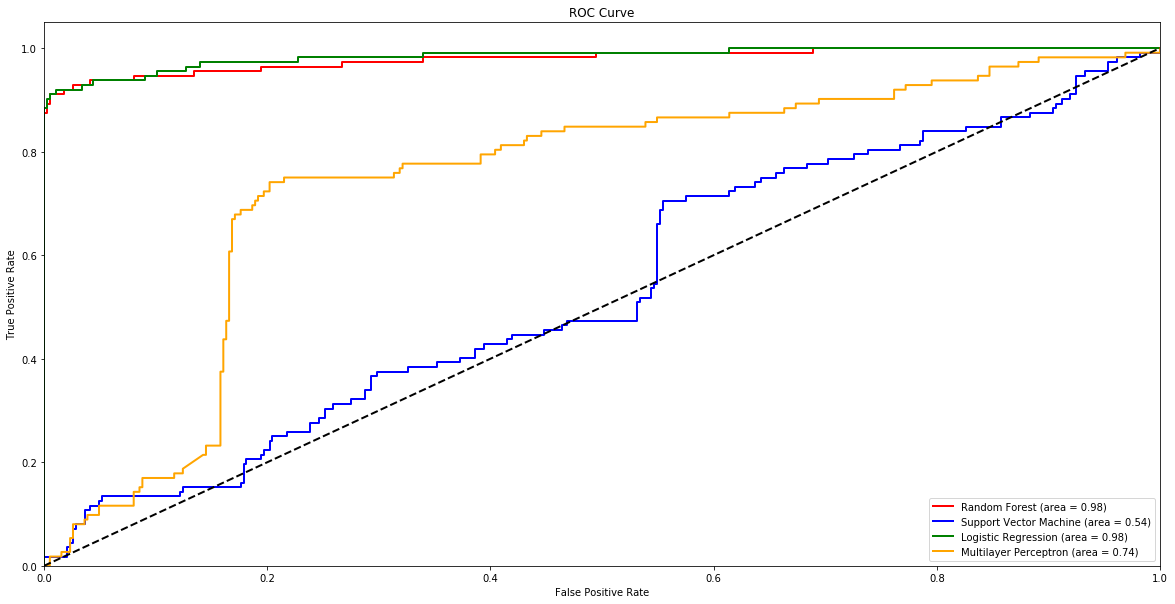

In [43]:
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='red',lw=2,
         label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot(svm_fpr, svm_tpr, color='blue',lw=2, 
         label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)

plt.plot(lr_fpr, lr_tpr, color='green',lw=2, 
         label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

plt.plot(mlp_fpr, mlp_tpr, color='orange',lw=2, 
         label='Multilayer Perceptron (area = %0.2f)' % mlp_roc_auc)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Based on the above ROC curve, we can say that, Logistic Regression, Random Forest and Neural Network-Multilayer Perceptron algorithms have nearly similar AUC results. A great model has AUC near to the 1 which means it has a good measure of separability.

This conclusion can be demonstrated by ROC curve results as well. These algorithms leans towards True Positive Rate rather than False Positive Rate. As a result, we can say that these algorithms have better performance of classification.